Gráfico de Scatter Plot

# Preparación del Entorno

In [1]:
# Limpio la memoria
rm(list = ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,627601,33.6,1404617,75.1,994247,53.1
Vcells,1149651,8.8,8388608,64.0,1769393,13.5


In [2]:
require("data.table")
require("rpart")

Loading required package: data.table

Loading required package: rpart



In [3]:
# Cargamos el dataset
dataset <- fread("competencia_01_alternativo.csv")

dir.create("./exp/", showWarnings = FALSE)
dir.create("./exp/DR3610/", showWarnings = FALSE)
setwd("./exp/DR3610/")

# Gráfico

In [4]:
# Filtra los datos para foto_mes igual a 202103
dataset <- dataset[foto_mes == 202103]

# Creo la clase_binaria SI={ BAJA+1, BAJA+2 } NO={ CONTINUA }
dataset[, clase_binaria := ifelse(clase_ternaria == "CONTINUA", "NO", "SI")]

In [5]:
# Inicia un archivo PDF para guardar los gráficos
pdf("scatter_plots.pdf", width = 8, height = 8)

Warning message in min(x):
"ningún argumento finito para min; retornando Inf"
Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"
Warning message in min(x):
"ningún argumento finito para min; retornando Inf"
Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"


ERROR: Error in plot.window(...): se necesitan valores finitos de 'xlim'


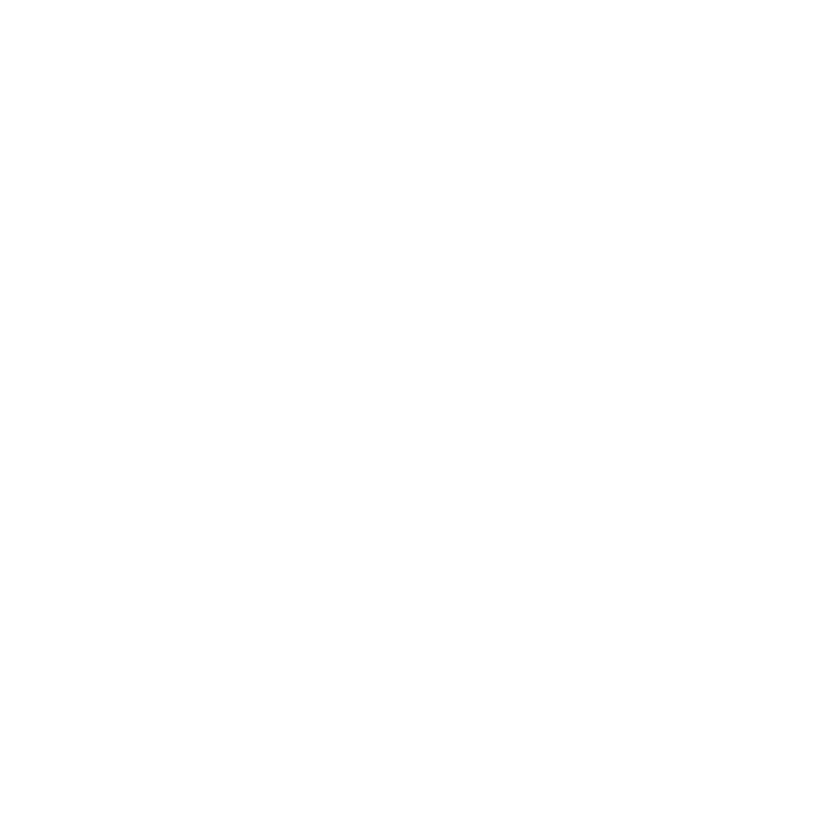

In [ ]:
# Itera a través de las variables y crea los gráficos de dispersión
for (columna in colnames(undersampled_dataset)) {
  if (is.numeric(undersampled_dataset[[columna]])) {  # Verifica si la columna es numérica
    # Crea un vector de colores basado en la variable de clase binaria
    colores <- ifelse(undersampled_dataset$clase_binaria == "SI", "blue", "red")
    
    # Crea el scatter plot con colores personalizados
    plot(undersampled_dataset[[columna]], 
         main = paste("Scatter Plot de", columna), 
         xlab = "Índice de datos", 
         ylab = columna,
         col = colores,
         pch = 16)  # Cambia el tipo de punto a 16 para que sea más visible
    
    # Agrega una leyenda
    legend("topright", legend = c("SI", "NO"), col = c("blue", "red"), pch = 16, title = "Clase Binaria")
  }
}


In [2]:
# Cierra el archivo PDF
dev.off()

null device 
          1